# MATPLOTLIB

- colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<a id='TOP'></a>

In [2]:
import numpy as np
import pandas as pd
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline

## TABLE OF CONTENTS

* <a href='#POLAR AXIS: BAR CHART ON POLAR AXIS'>POLAR AXIS: BAR CHART ON POLAR AXIS</a>
* <a href='#POLAR AXIS: BAR CHART WITH LABELED DATA'>POLAR AXIS: BAR CHART WITH LABELED DATA</a>
* <a href='#POLAR AXIS: LINE CHART'>POLAR AXIS: LINE CHART</a>
* <a href='#POLAR AXIS: SCATTER PLOT'>POLAR AXIS: SCATTER PLOT</a>


***


<a id='GENERATE SOME DATA'></a>

# GENERATE SOME DATA

In [1]:
X = np.linspace(1,10,20)
X

NameError: name 'np' is not defined

In [5]:
y = randint(1,50,20)
y

array([ 6, 30, 44, 34, 30, 47, 21, 42, 41, 15,  5, 28, 48,  2, 24, 15, 44,
        4, 33, 24])

In [5]:
X.size, y.size

(20, 20)

<a id='POLAR AXIS: BAR CHART ON POLAR AXIS'></a>

# POLAR AXIS: BAR CHART ON POLAR AXIS

* **x**: angle of the center of the section we're adding.
* **height** and bottom: are a bit like the ylim values. They control the thickness of the section
* **width**: angle of the section

cool source: https://www.python-graph-gallery.com/circular-barplot-basic

### <a href='#TOP'>BACK TO TOP</a>
***

In [15]:
np.random.seed(0)
N=20
theta = np.linspace(0.0, 2*np.pi, N, endpoint=False)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
colors = plt.cm.plasma(radii/10)

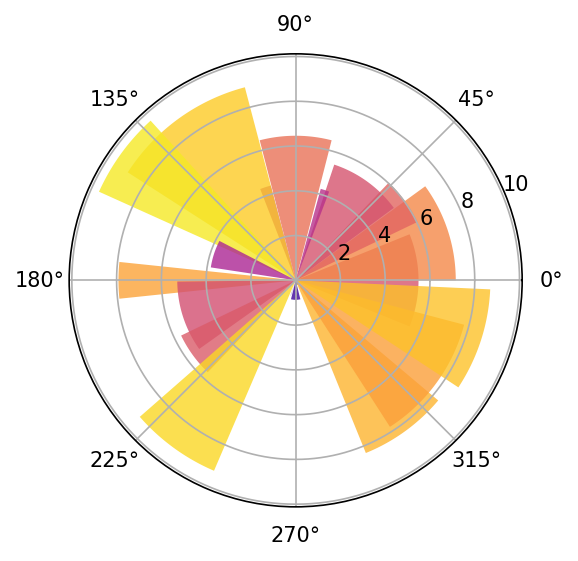

In [17]:
plt.figure(dpi=150)
ax=plt.subplot(1,1,1, projection='polar')
ax.bar(theta, radii, width=width, bottom=0, color=colors, alpha=0.8)
plt.show()

<a id='POLAR AXIS: BAR CHART WITH LABELED DATA'></a>

# POLAR AXIS: BAR CHART WITH LABELED DATA

### <a href='#TOP'>BACK TO TOP</a>
***

In [226]:
# import pandas for data wrangling
import pandas as pd

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['Statistic: ' + str(i) for i in list(range(1, 31)) ],
            'Value': np.random.randint(low=1, high=100, size=30)
            #'Value': np.linspace(0.0,200,30,endpoint=False)
        })

#np.arange(len(vals_sum))*randint(1,10,1)
colors = plt.cm.magma(np.arange(len(df['Value']))*randint(1,10,1))

***
*TIP: To remove grid use:*
* Turn of both x and y axis lines - `plt.axis('off')`
* Turn of x ticks. Meaning leave of only round cicrlces - `plt.xticks([])`
* Turn of y ticks meaning leave only lines going form centre to edges - `plt.yticks([])`
***

***
*TIP: to move gridlines behind tha data use `ax.set_axisbelow(True)`*
***

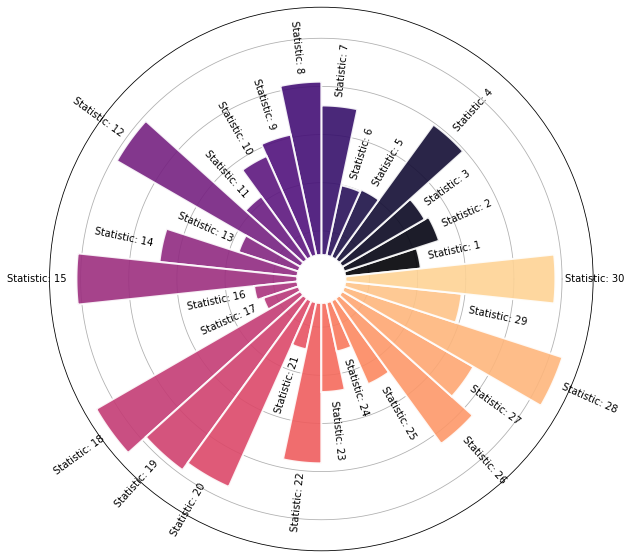

In [231]:
# set figure size
plt.figure(figsize=(20,10))


# plot polar axis
ax = plt.subplot(111, polar=True, alpha=0.4)

#remove labels for x axis and y axis. Radious indicators.
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_axisbelow(True)
ax.spines["polar"].set_color('k')
# remove grid

# Turn of both x and y axis lines
#plt.axis('off')

#Turn of x ticks. Meaning leave of only round cicrlces
plt.xticks([])

# Turn of y ticks meaning leave only lines going form centre to edges
#plt.yticks([])

# Set the coordinates limits
upperLimit = 100
lowerLimit = 10

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)


# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=colors,
    alpha=0.9)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 



***

<a id='POLAR AXIS: LINE CHART'></a>

# POLAR AXIS: LINE CHART

### <a href='#TOP'>BACK TO TOP</a>
***

In [234]:
r = np.arange(0,2,0.01)
theta = 2*np.pi*r

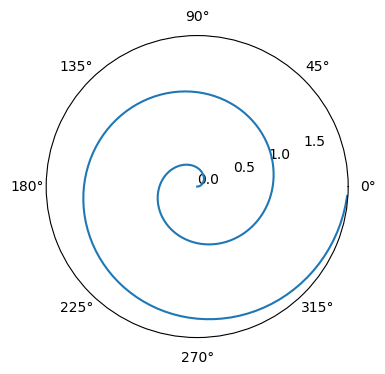

In [250]:
plt.figure(dpi=100)
ax=plt.subplot(111, projection='polar')
ax.plot(theta,r)
ax.set_rmax(2)
ax.set_rticks([0,0.5,1,1.5])
ax.set_rlabel_position(20)
ax.grid(False)
plt.show()


***

<a id='POLAR AXIS: SCATTER PLOT'></a>

# POLAR AXIS: SCATTER PLOT
source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_scatter.html

### <a href='#TOP'>BACK TO TOP</a>
***

In [24]:
np.random.seed(0)

N=150

#radious of points
r = 1*np.random.rand(N)
theta = 2*np.pi*np.random.rand(N)
area = 60*2*np.pi*r**2
colors = theta

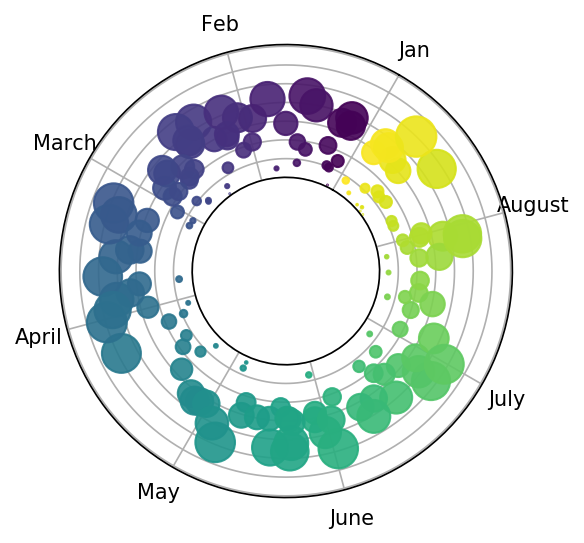

In [47]:
fig = plt.figure(dpi=150)

ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r , c=colors, s=area, cmap='viridis', alpha=0.9)

ax.set_yticklabels([])
ax.set_xticklabels(['Jan','Feb','March','April','May','June','July','August','September','October','November','December'])
ax.set_axisbelow(True)
ax.set_rorigin(-1)
ax.set_theta_zero_location('W', offset=600)

plt.show()

***